In [1]:
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


country_of_author = pd.read_excel('https://raw.githubusercontent.com/ChunChong01234/map_ploting/3bb550484aa43d69e1ae75a93eeffbe70b561a4d/Corresponding%20author%20countries.xlsx')

shapefile_path = 'https://raw.githubusercontent.com/ChunChong01234/map_ploting/3bb550484aa43d69e1ae75a93eeffbe70b561a4d/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'


world = gpd.read_file(shapefile_path)

world = world[['NAME', 'geometry','SOV_A3']]

world['NAME'] = world['NAME'].str.upper()

matching = country_of_author['Country'].isin(world['NAME'])
country_of_author['Match']= matching
print('Country Name Not Matching:\n',country_of_author[country_of_author['Match']==False])

country_of_author.columns = ['NAME', 'Publications', 'Match']
country_of_colab = pd.read_excel("https://raw.githubusercontent.com/ChunChong01234/map_ploting/3bb550484aa43d69e1ae75a93eeffbe70b561a4d/Country%20collboration.xlsx")

result = country_of_colab.groupby('NAME')['Frequency'].sum().reset_index()
country_of_colab = result.copy()
matching = country_of_colab['NAME'].isin(world['NAME'])
country_of_colab['Match']= matching
print('Country Name Not Matching:\n',country_of_colab[country_of_colab['Match']==False])


full_dataset = pd.merge(world, country_of_author, on='NAME', how='outer')
full_dataset = pd.merge(full_dataset,country_of_colab, on='NAME', how='outer')
full_dataset = gpd.GeoDataFrame(full_dataset)
full_dataset = full_dataset.set_geometry('geometry')


Country Name Not Matching:
 Empty DataFrame
Columns: [Country, Publications, Match]
Index: []
Country Name Not Matching:
 Empty DataFrame
Columns: [NAME, Frequency, Match]
Index: []


(Figure 3 of MethodX)
as [Figure 1] , 
change the label of legends to 'Number of Publications', the word 'longitude' should be shown on x-axis

C:\Users\USER\AppData\Local\Temp\ipykernel_23756\1916797952.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')


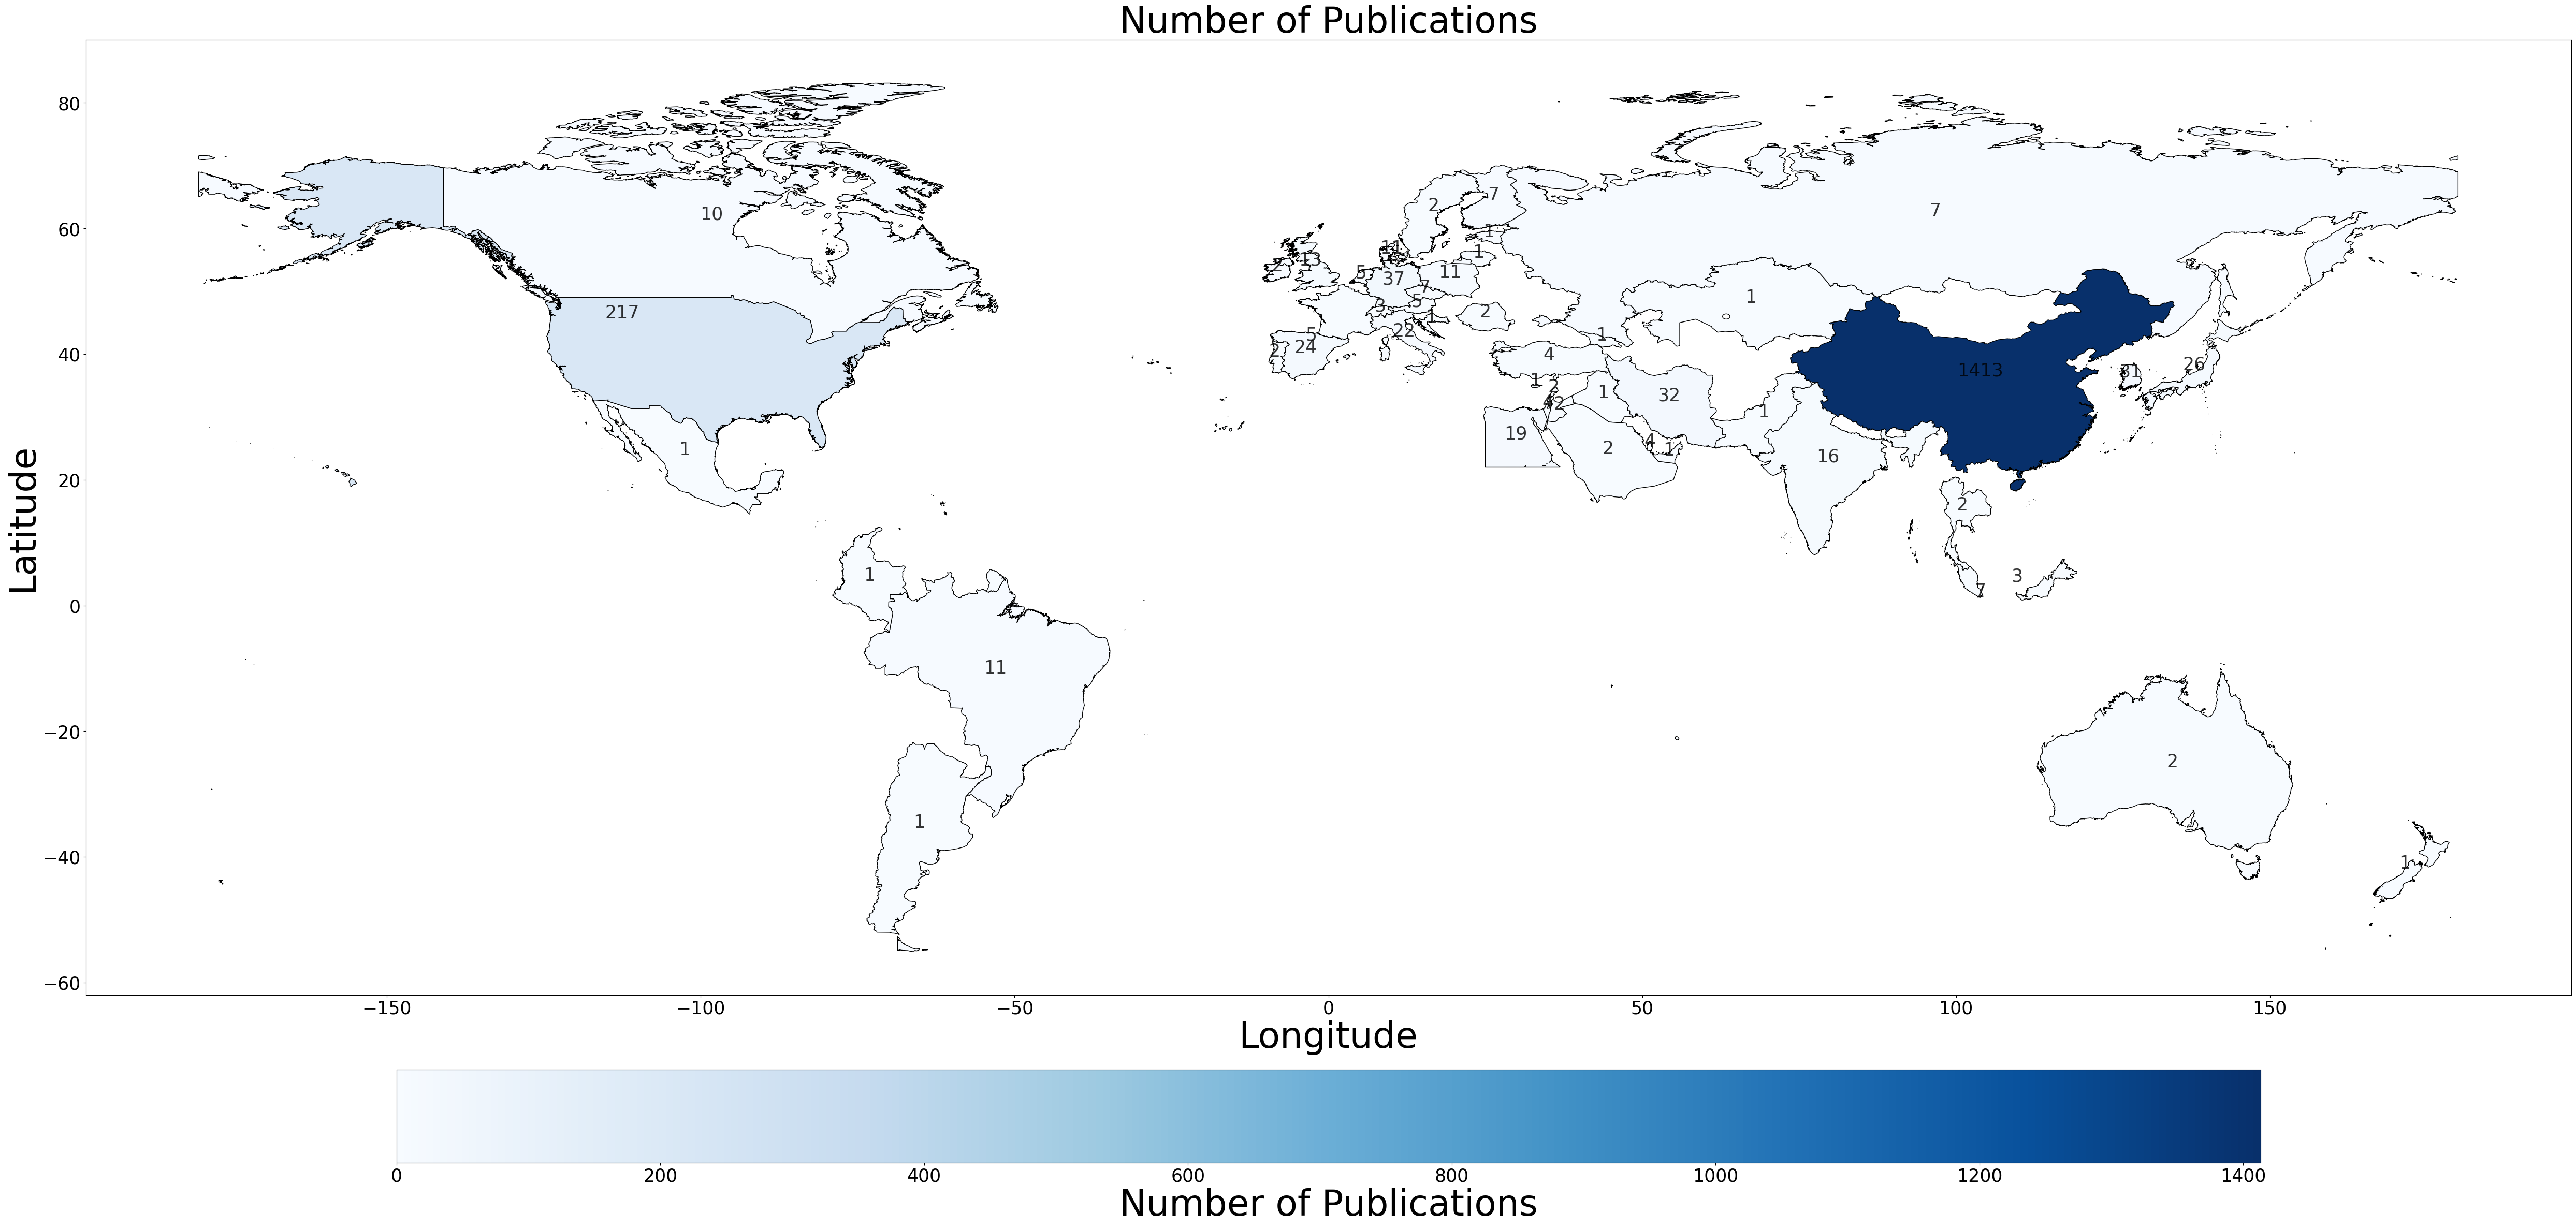

In [3]:
#Figure 1 

from geopandas.geodataframe import GeoDataFrame
from matplotlib.cm import ScalarMappable
from pandas.core.frame import DataFrame
from matplotlib import cm

fig, ax = plt.subplots(figsize=(60, 40))
partial_dataset: DataFrame | GeoDataFrame | None = full_dataset.copy()

cmap = plt.cm.get_cmap('Blues')
# Create the colorbar
norm = plt.Normalize(vmin=0, vmax=partial_dataset['Publications'].max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)

cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)

partial_dataset.plot(column=partial_dataset['Publications'], cmap=cmap, norm= norm, edgecolor='black', ax=ax)

fontsize = 50
plt.xticks(fontsize=fontsize/2)
plt.yticks(fontsize=fontsize/2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.title('Number of Publications',fontsize = fontsize)
cbar.set_label('Number of Publications', fontsize = fontsize)
cbar.ax.tick_params(labelsize=fontsize/2)

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)

for idx, row in partial_dataset.iterrows():
    if row['Publications'] > 0:
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, f"{(int(row['Publications']))}", fontsize=int(fontsize/2), ha='center', color='black', alpha=0.8)




plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_23756\1399240236.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')


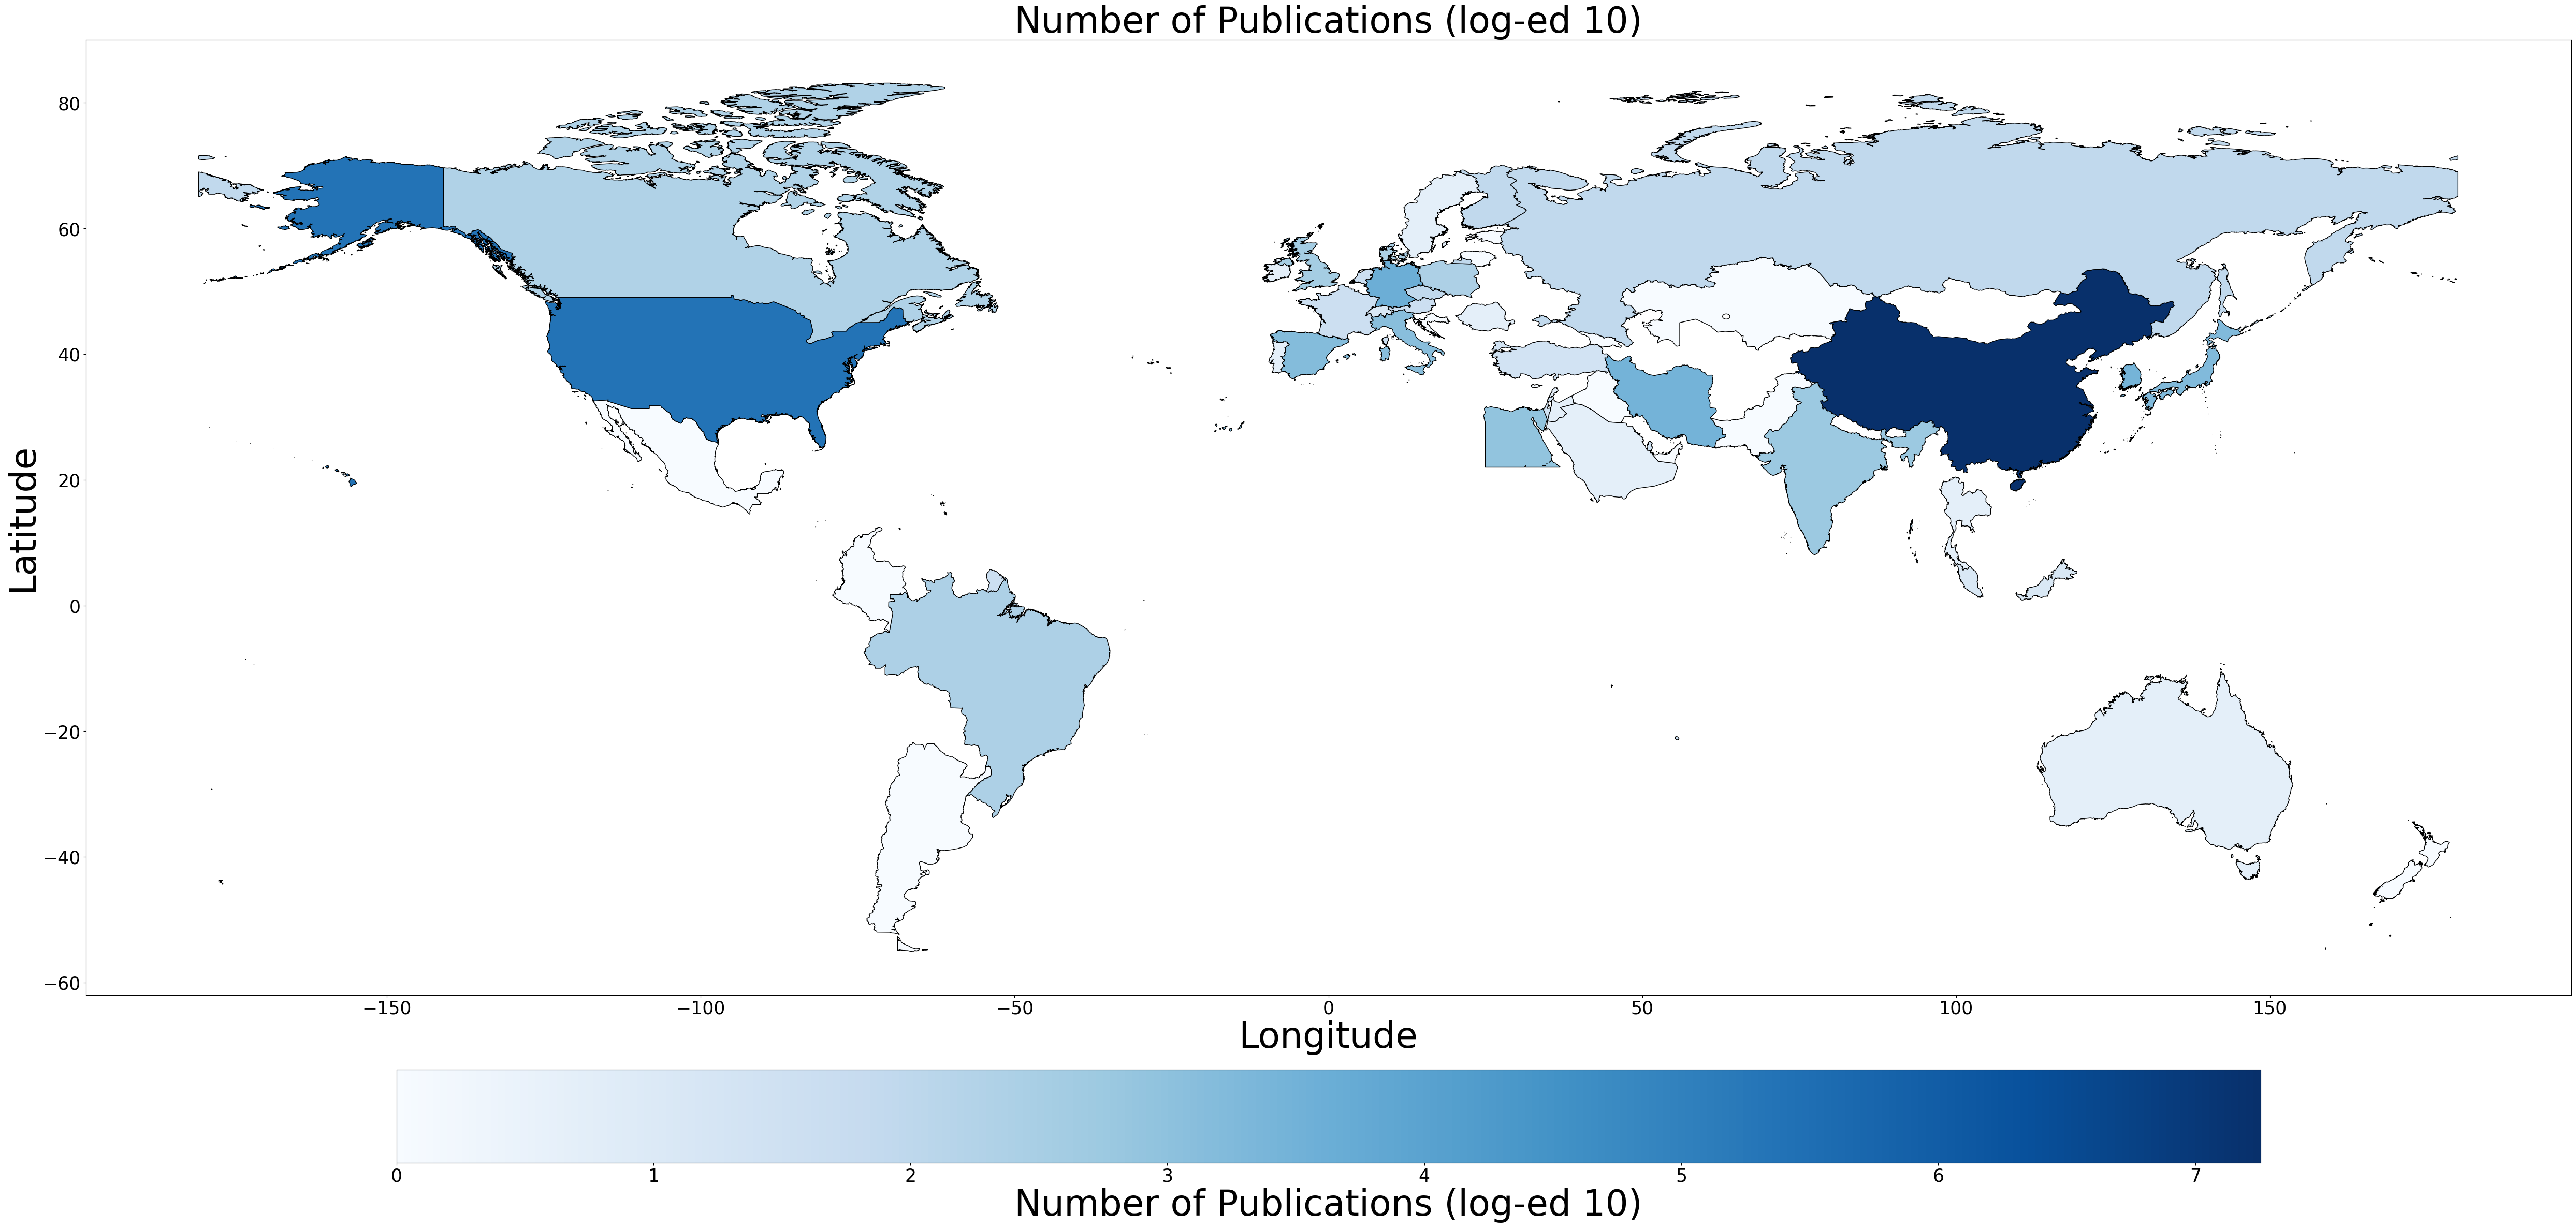

In [4]:
# Figure 1 - Log-ed 10 publication number, because the data too sparce

from geopandas.geodataframe import GeoDataFrame
from matplotlib.cm import ScalarMappable
from pandas.core.frame import DataFrame


fig, ax = plt.subplots(figsize=(60, 40))
partial_dataset: DataFrame | GeoDataFrame | None = full_dataset.copy()
partial_dataset['Publications']= np.log(partial_dataset['Publications'])


cmap = plt.cm.get_cmap('Blues')
norm = plt.Normalize(vmin=0, vmax=partial_dataset['Publications'].max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)

cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)

partial_dataset.plot(column=partial_dataset['Publications'], cmap=cmap, norm= norm, edgecolor='black', ax=ax)

fontsize = 50
plt.xticks(fontsize=fontsize/2)
plt.yticks(fontsize=fontsize/2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.title('Number of Publications (log-ed 10)',fontsize = fontsize)
cbar.set_label('Number of Publications (log-ed 10)', fontsize = fontsize)
cbar.ax.tick_params(labelsize=fontsize/2)

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)

for idx, row in partial_dataset.iterrows():
    if row['Publications'] > 0:
        centroid = row['geometry'].centroid
        #ax.text(centroid.x, centroid.y, f"{(float(row['Publications']))}", fontsize=int(fontsize/2), ha='center', color='black', alpha=0.8)

plt.show()


(Figure 6 of MethodX)
as [Figure 2] different colour to represent frequency of collaborations
size of the nodes represent the total frequency of collaborations

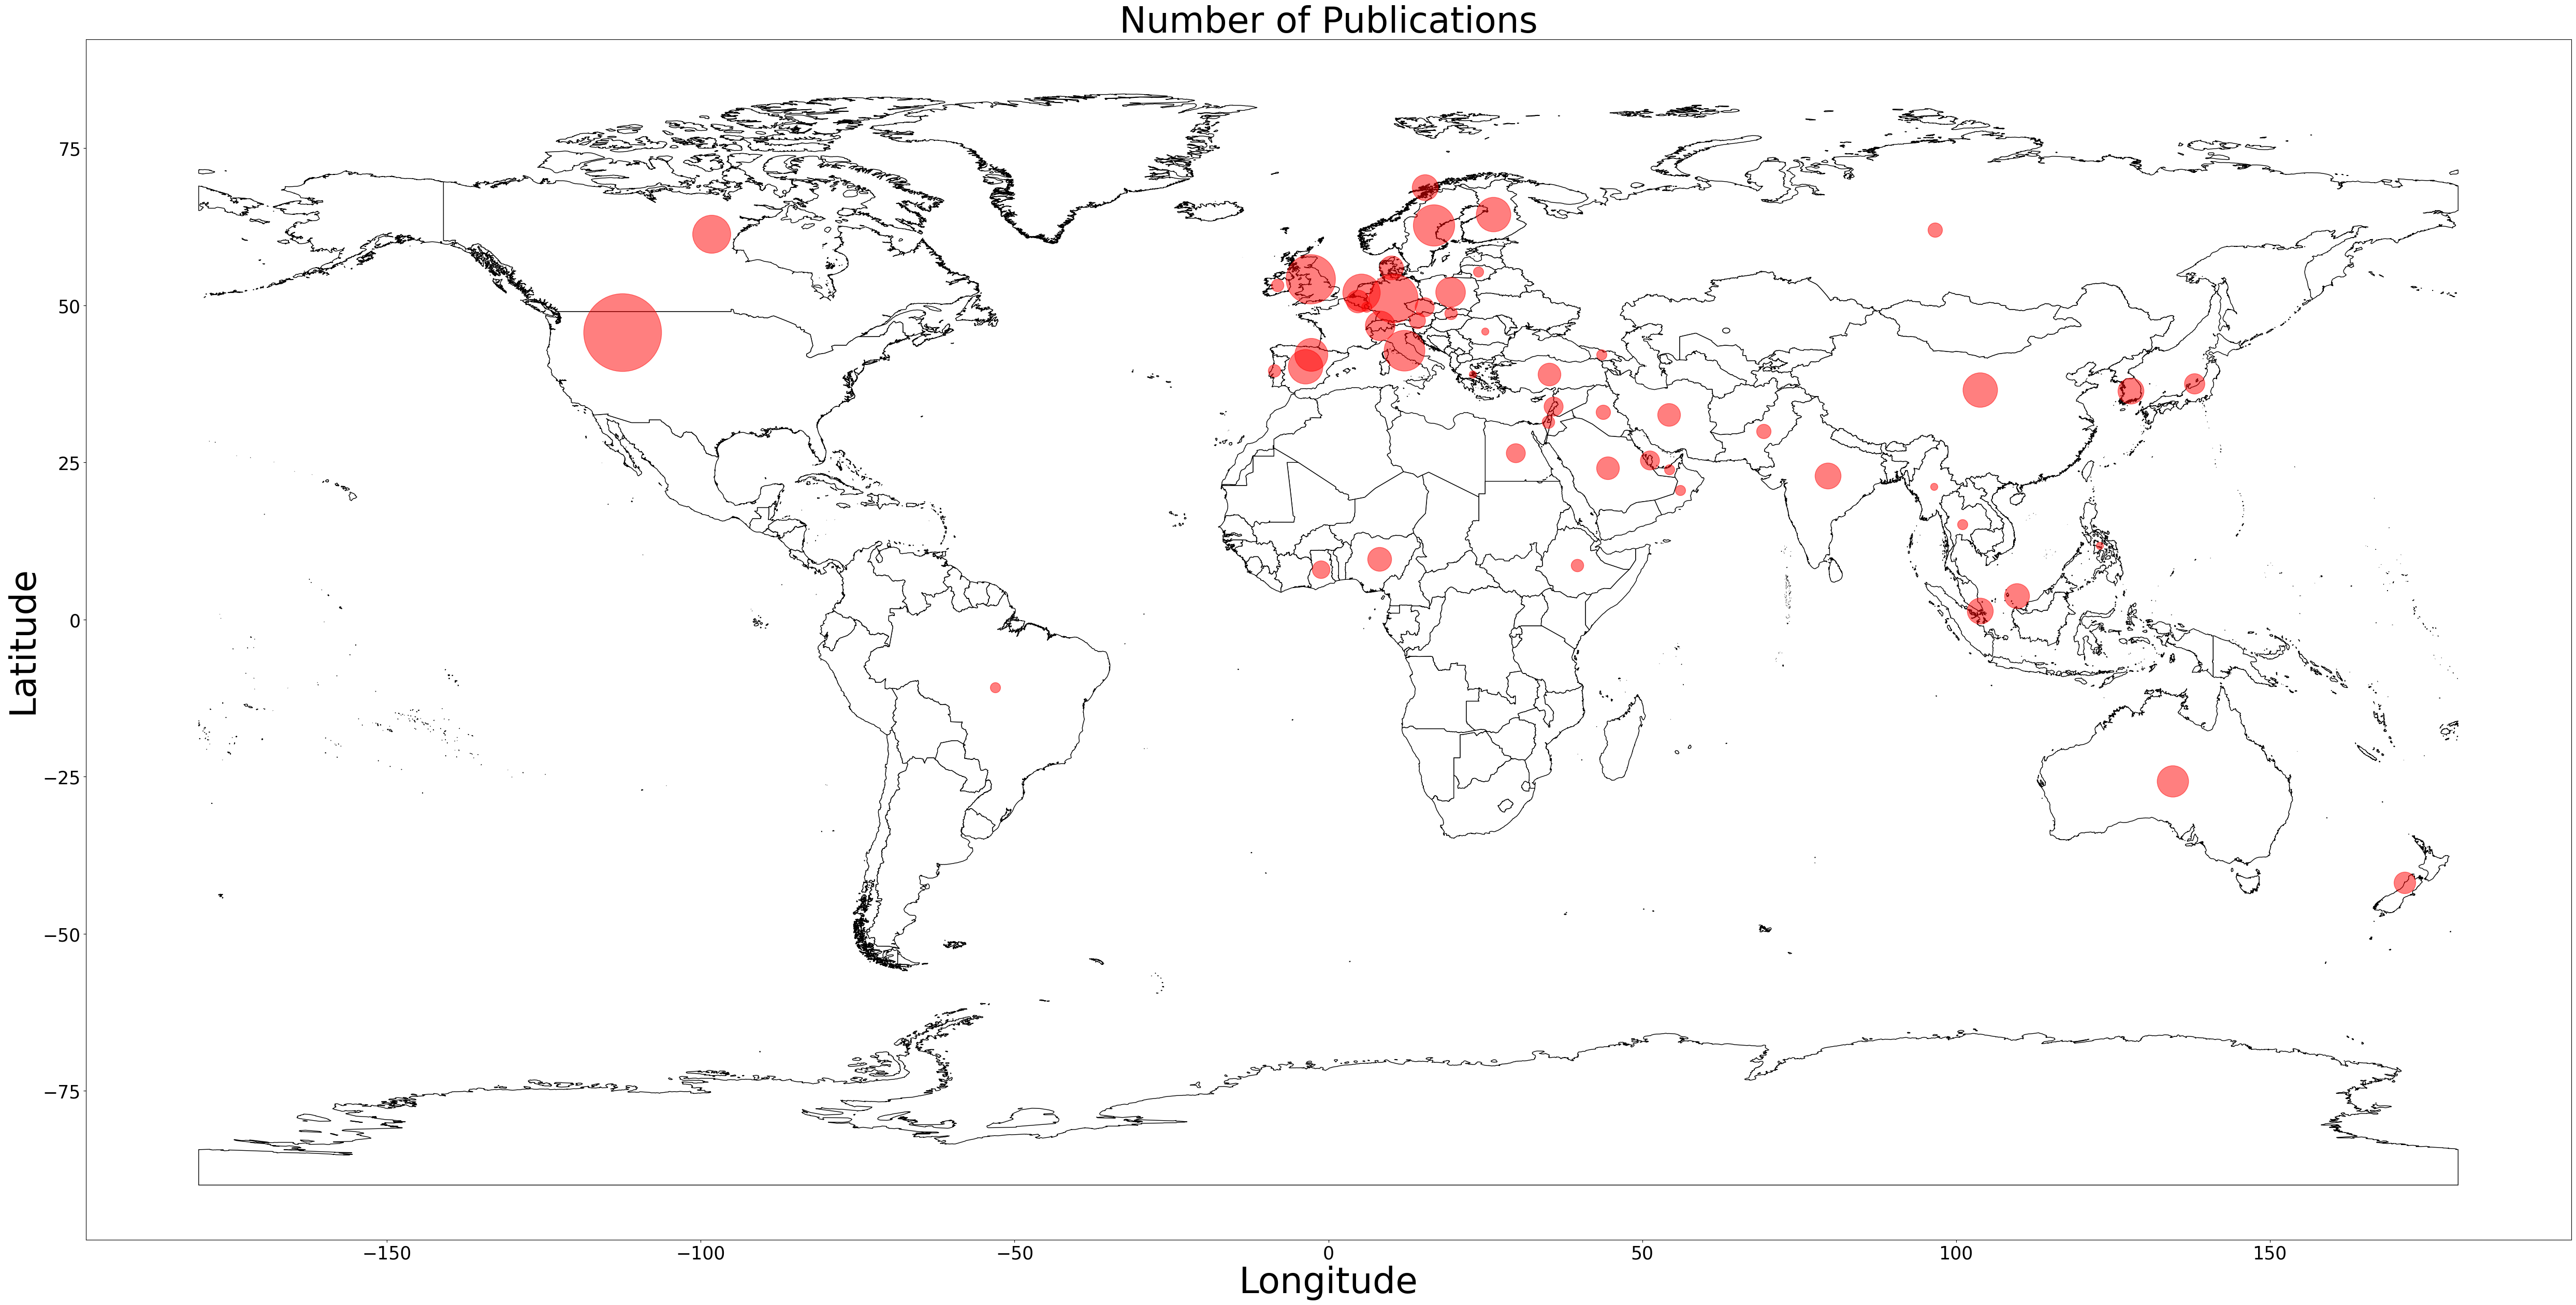

In [7]:
#Figure 2 - Dot - Country collboration.xlsx, Cmap - Corresponding author countries.xlsx

from geopandas.geodataframe import GeoDataFrame
from matplotlib.cm import ScalarMappable
from pandas.core.frame import DataFrame
dot = 'Frequency'
color_map = 'Publications'

fig, ax = plt.subplots(figsize=(60, 40))

partial_dataset.plot(color = 'white', edgecolor='black', ax=ax)


fontsize = 50
plt.xticks(fontsize=fontsize/2)
plt.yticks(fontsize=fontsize/2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.title('Number of Publications',fontsize = fontsize)


plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)

for idx, row in partial_dataset.iterrows():
    if row[dot] > 0:
        ax.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y, s=row[dot]*100, alpha=0.5, label=row['NAME'], color = 'red')




plt.show()


[Figure 3]
merging the information for Figure 1 and Figure 2

C:\Users\USER\AppData\Local\Temp\ipykernel_23756\2298393019.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')


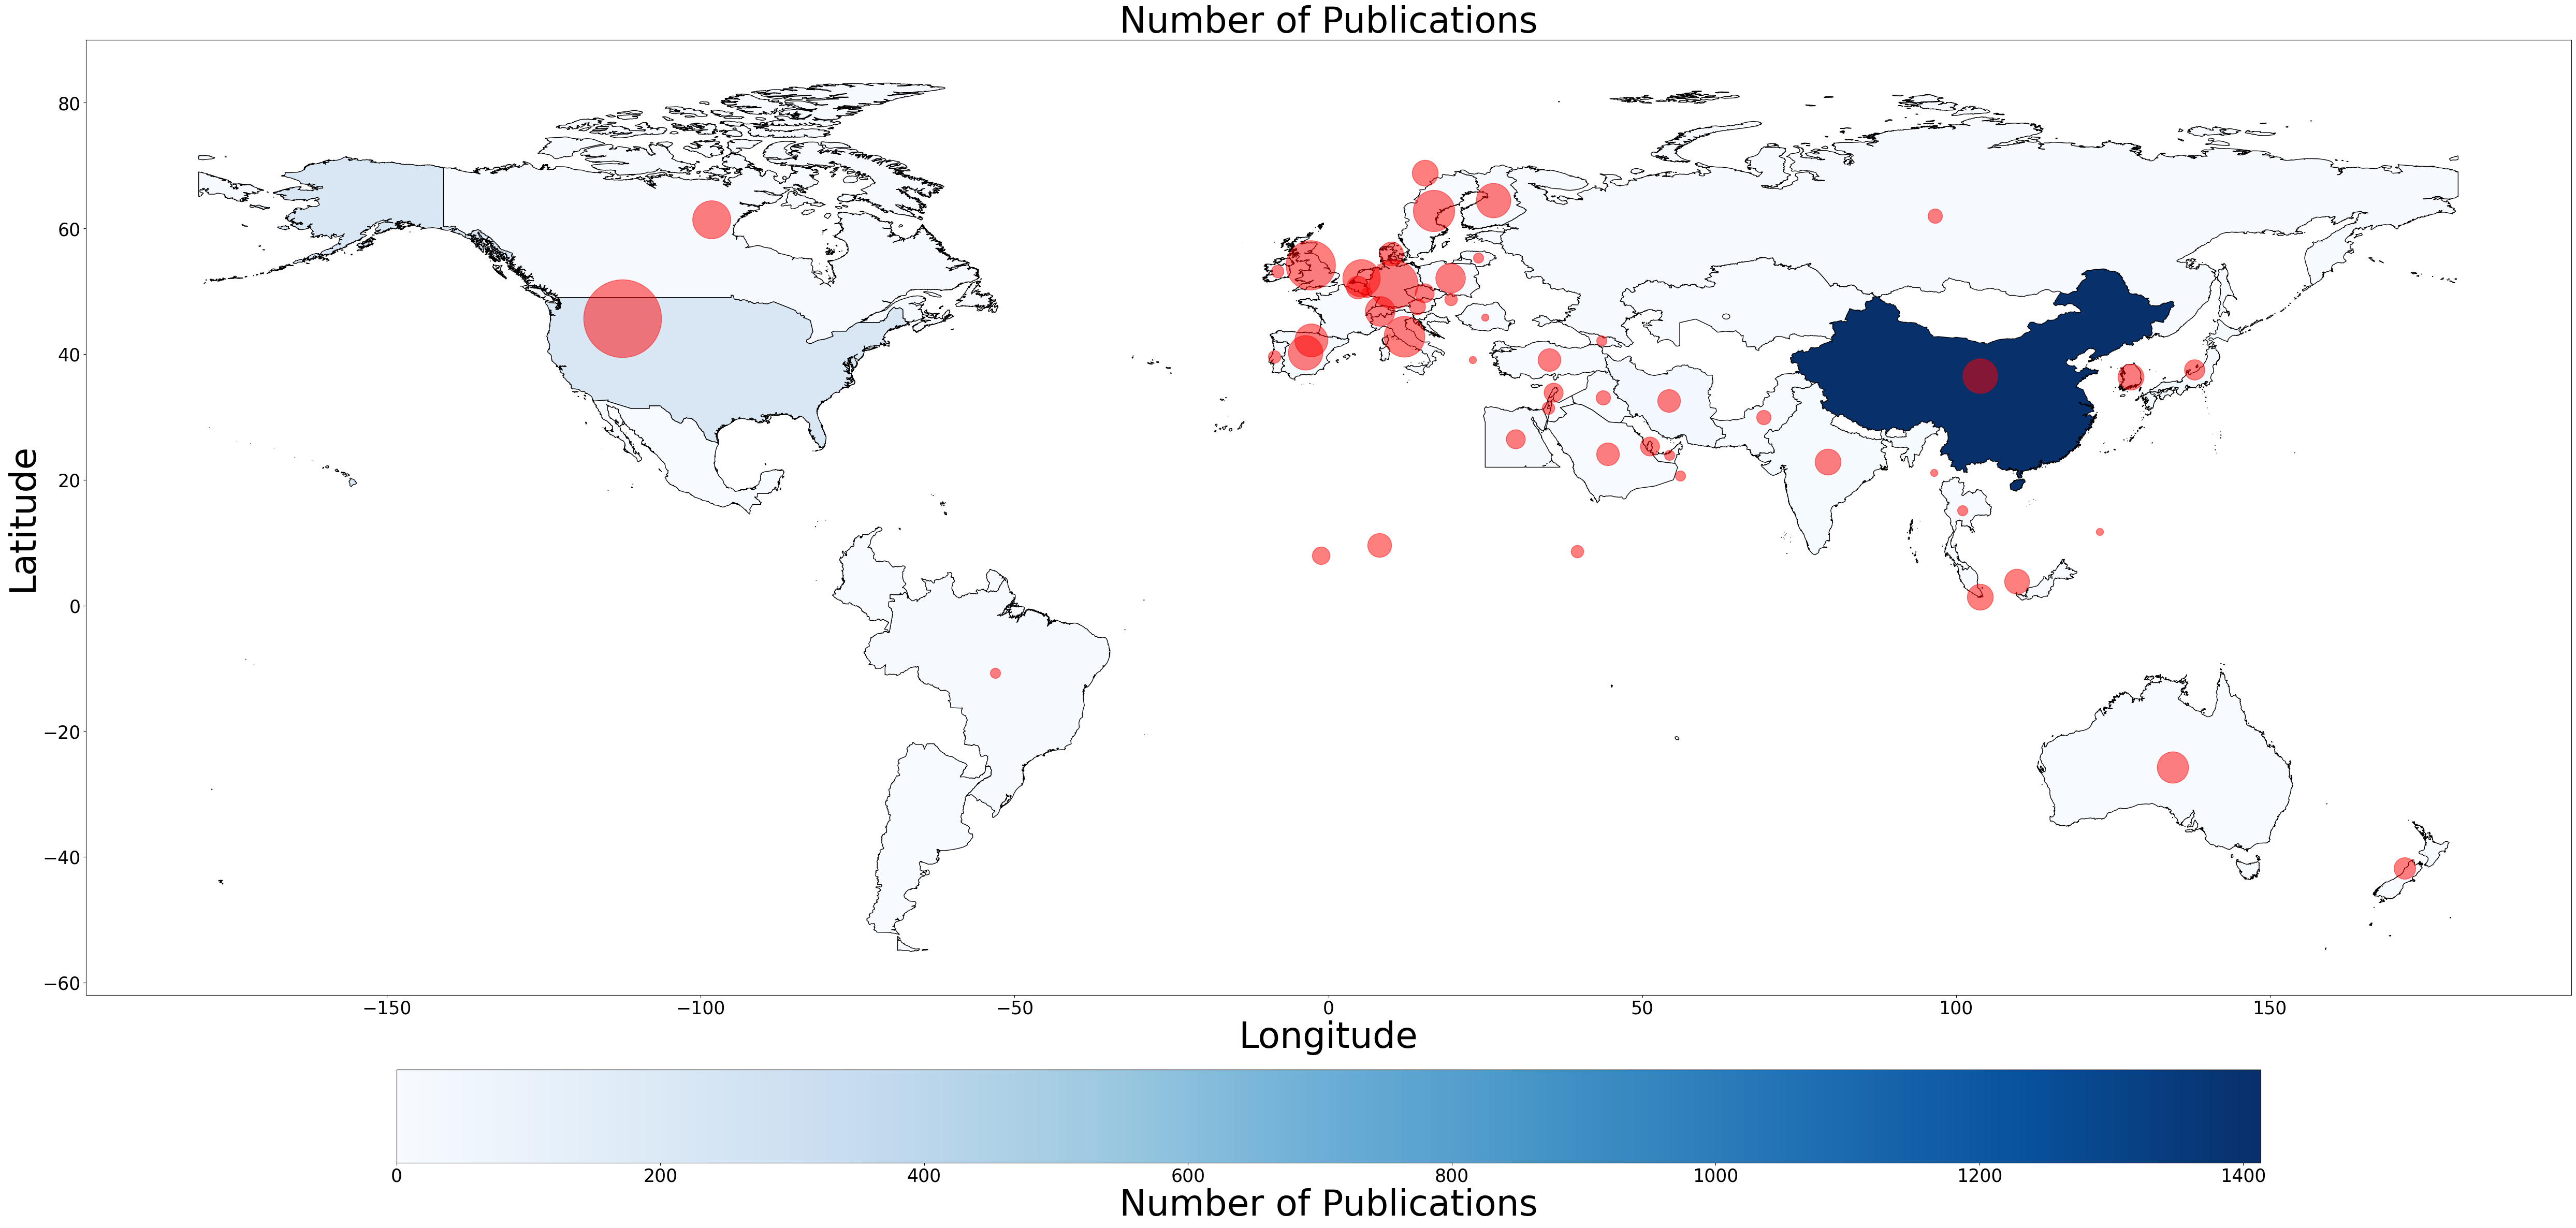

In [8]:
# Figure 3

from geopandas.geodataframe import GeoDataFrame
from matplotlib.cm import ScalarMappable
from pandas.core.frame import DataFrame

dot = 'Frequency'
color_map = 'Publications'

fig, ax = plt.subplots(figsize=(60, 40))
partial_dataset: DataFrame | GeoDataFrame | None = full_dataset.copy()

cmap = plt.cm.get_cmap('Blues')
norm = plt.Normalize(vmin=0, vmax=partial_dataset[color_map].max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)

partial_dataset.plot(column=color_map,norm= norm, edgecolor='black', ax=ax,cmap=cmap)


fontsize = 50
plt.xticks(fontsize=fontsize/2)
plt.yticks(fontsize=fontsize/2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.title('Number of Publications',fontsize = fontsize)


plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)

for idx, row in partial_dataset.iterrows():
    if row[dot] > 0:
        ax.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y, s=row[dot]*100, alpha=0.5, label=row['NAME'], color = 'red')

cbar.set_label('Number of Publications', fontsize = fontsize)
cbar.ax.tick_params(labelsize=fontsize/2)


plt.show()


(Figure 9 of of MethodX)
as [Figure 4] legends represent Total publications (Count log scale) [highlighting Top 10 countries]
{possible to add the information of collaboration frequecy into this chart?}

C:\Users\USER\AppData\Local\Temp\ipykernel_23756\1342643720.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\USER\AppData\Local\Temp\ipykernel_23756\1342643720.py:8: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Text(0.5, 0.92, 'Projects Count per Country')

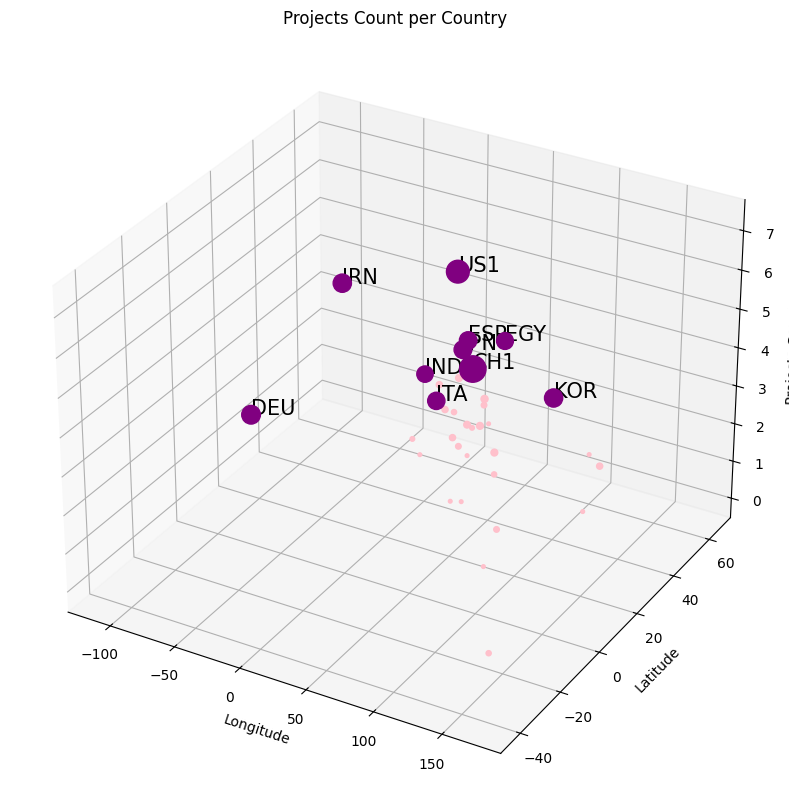

In [14]:
partial_dataset = full_dataset.copy()
partial_dataset.dropna(inplace=True)
# Prepare the data
top = 10
partial_dataset['Bubble'] =np.log(partial_dataset['Publications'])

lats = [centroid.y for centroid in partial_dataset['geometry'].centroid]
lons = [centroid.x for centroid in partial_dataset['geometry'].centroid]
partial_dataset['Lons']=lons
partial_dataset['Lats']= lats

partial_dataset.sort_values(by= 'Bubble',ascending=False,inplace=True)
partial_dataset= partial_dataset.reset_index()


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
top= 10

sc = ax.scatter(lons[top:], lats[top:], partial_dataset['Bubble'][top:], s=partial_dataset['Bubble'][top:]*10, color = 'pink', alpha=1)
sc2 = ax.scatter(lons[:top], lats[:top], partial_dataset['Bubble'][:top], s=partial_dataset['Bubble'][:top]*50, color = 'purple', alpha=1)
for long, lati,pub,txt in zip(lons,lats,partial_dataset['Bubble'][:top],partial_dataset['SOV_A3'][:top]):
    ax.text(long,lati,pub, txt,fontsize=(15 if len(txt)<7 else 10), color='black')


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Projects Count')
ax.set_title('Projects Count per Country')

In [10]:
import plotly.graph_objects as go
import numpy as np

partial_dataset = full_dataset.copy()
partial_dataset.dropna(inplace=True)
# Prepare the data
top = 10
partial_dataset['Bubble'] =np.log(partial_dataset['Publications'])

lats = [centroid.y for centroid in partial_dataset['geometry'].centroid]
lons = [centroid.x for centroid in partial_dataset['geometry'].centroid]
partial_dataset['Lons']=lons
partial_dataset['Lats']= lats

partial_dataset.sort_values(by= 'Bubble',ascending=False,inplace=True)
partial_dataset= partial_dataset.reset_index()


print("First 5 Longitude (x):", partial_dataset['Lons'][:5])
print("First 5 Latitude (y):", partial_dataset['Lats'][:5])
print("First 5 Bubble Sizes (z):", partial_dataset['Bubble'][:5])

# Create 3D scatter plot
fig = go.Figure()

# Add data for top countries
fig.add_trace(go.Scatter3d(
    x=partial_dataset['Lons'][:top], 
    y=partial_dataset['Lats'][:top], 
    z=partial_dataset['Bubble'][:top], 
    mode='markers+text',
    marker=dict(
        size=partial_dataset['Bubble'][:top]*10,  # Bubble size
        color='purple',  # Bubble color
        opacity=1
    ),
    text=partial_dataset['SOV_A3'][:top],
    textposition='top center',
    name='Top Countries'
))

# Add data for others
fig.add_trace(go.Scatter3d(
    x=partial_dataset['Lons'][top:], 
    y=partial_dataset['Lats'][top:], 
    z=partial_dataset['Bubble'][top:], 
    mode='markers',
    marker=dict(
        size=partial_dataset['Bubble'][top:]*10,  # Bubble size
        color='pink',  # Bubble color
        opacity=1
    ),
    name='Other Countries'
))

# Set plot labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Projects Count'
    ),
    title='Projects Count per Country',
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show(renderer='browser')


C:\Users\USER\AppData\Local\Temp\ipykernel_23756\3839420688.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lats = [centroid.y for centroid in partial_dataset['geometry'].centroid]
C:\Users\USER\AppData\Local\Temp\ipykernel_23756\3839420688.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lons = [centroid.x for centroid in partial_dataset['geometry'].centroid]


First 5 Longitude (x): 0    103.832592
1   -112.496164
2     10.381494
3     54.276947
4    127.819094
Name: Lons, dtype: float64
First 5 Latitude (y): 0    36.559273
1    45.688119
2    51.106364
3    32.570678
4    36.373354
Name: Lats, dtype: float64
First 5 Bubble Sizes (z): 0    7.253470
1    5.379897
2    3.610918
3    3.465736
4    3.433987
Name: Bubble, dtype: float64
